Task:
Gather statistical information about the data, such as:
1. summary statistics,
2. histograms,
3. outliers,
4. variable relationships (e.g. correlation) 

about at least three of the attributes.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas.plotting as plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

data = pd.read_csv("data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Let's select 3 variables for analysis. They shouldn't be corralated with each other**

# Variables selection

Text(0.5, 1.0, 'Correlation Map')

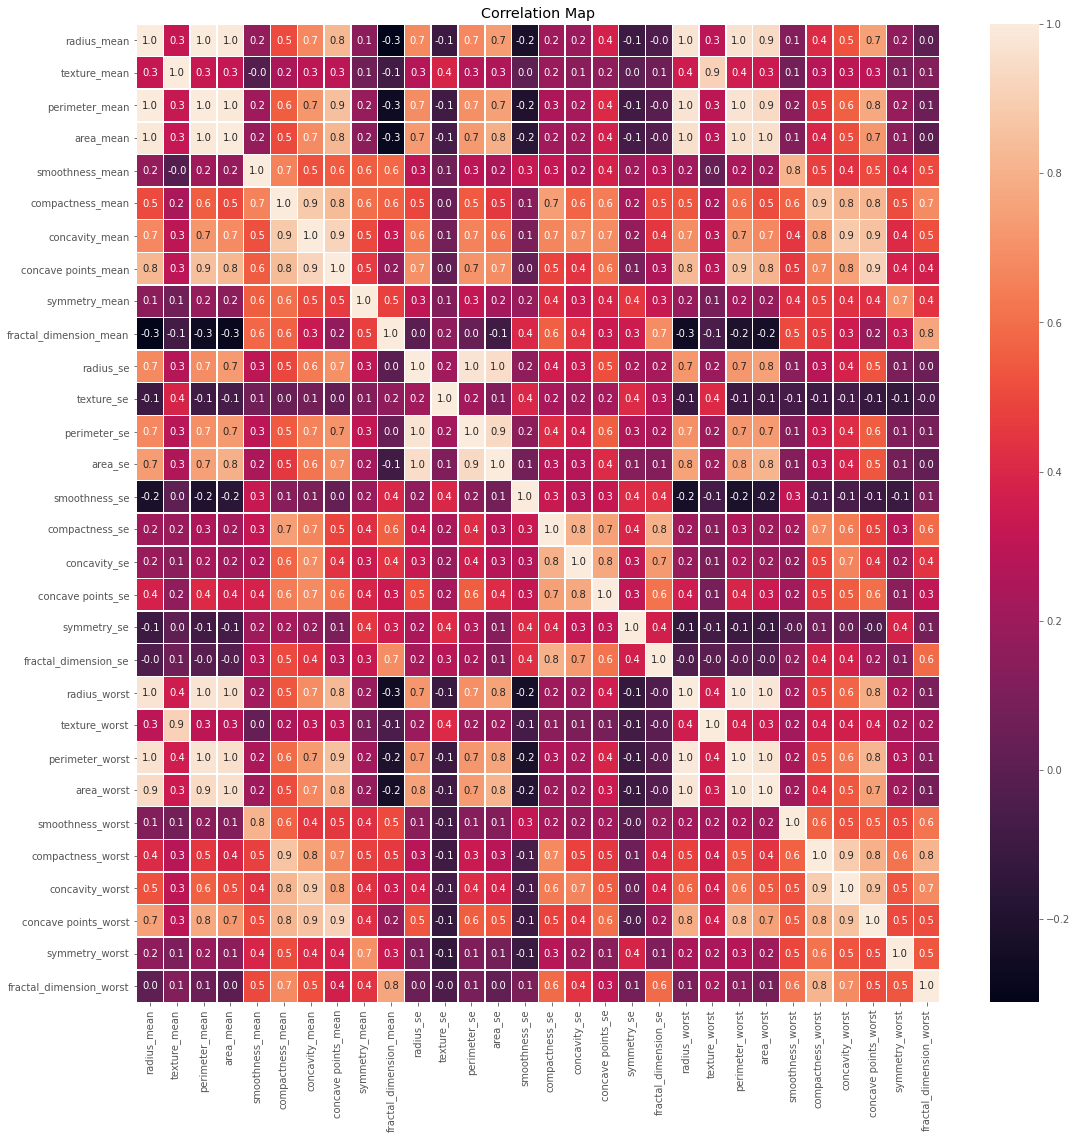

In [3]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')

Appropriate features are:
* area_worst
* smoothness_worst
* texture_mean

Text(0.5, 1.0, 'Correlation map of selected variables')

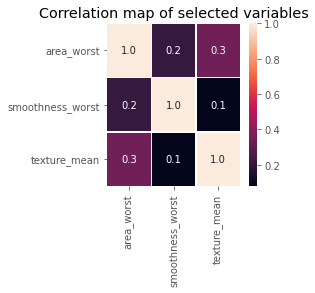

In [43]:
fdata = data[['area_worst', 'smoothness_worst', 'texture_mean']]
f,ax=plt.subplots(figsize = (3,3))
sns.heatmap(fdata.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation map of selected variables')

**The next step is to clear data form outliers**

# Outliers

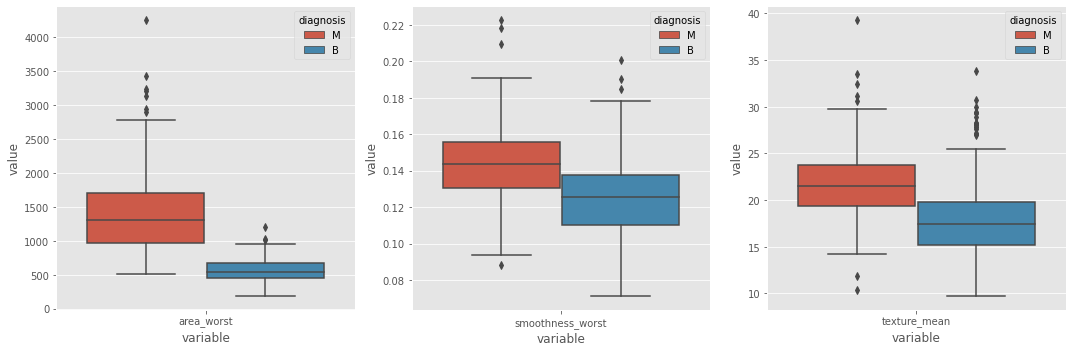

In [45]:
melted_data_rm = pd.melt(data,id_vars = "diagnosis",value_vars = ['area_worst'])
melted_data_sm = pd.melt(data,id_vars = "diagnosis",value_vars = ['smoothness_worst'])
melted_data_ts = pd.melt(data,id_vars = "diagnosis",value_vars = ['texture_mean'])

fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_rm,ax=axs[0])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_sm,ax=axs[1])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_ts,ax=axs[2])
fig.tight_layout()

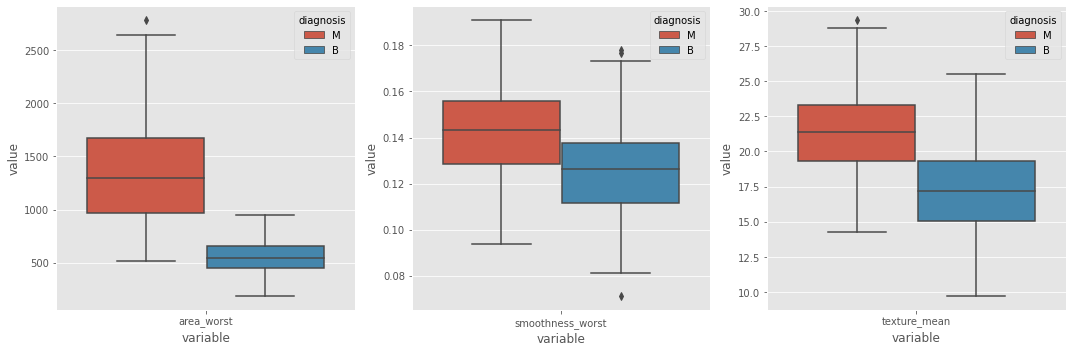

In [46]:
def clear_outlires(feature, data):    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1    
    return data[~((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

def clear_outlires_m_b(feature, data):    
    return pd.concat([clear_outlires(feature, data[data["diagnosis"] == "M"]), 
                    clear_outlires(feature, data[data["diagnosis"] == "B"])])

data_c = clear_outlires_m_b('texture_mean', clear_outlires_m_b('smoothness_worst', clear_outlires_m_b('area_worst', data)))

melted_data_rm = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['area_worst'])
melted_data_sm = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['smoothness_worst'])
melted_data_ts = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['texture_mean'])

fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_rm,ax=axs[0])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_sm,ax=axs[1])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_ts,ax=axs[2])
fig.tight_layout()


# Summary Statistics

In [47]:
data_c[['area_worst', 'smoothness_worst', 'texture_mean']].describe()

area_worst  smoothness_worst  texture_mean
count   527.000000        527.000000    527.000000
mean    854.615370          0.132101     18.842486
std     503.721347          0.021426      3.686012
min     185.200000          0.071170      9.710000
25%     514.650000          0.117150     16.070000
50%     684.500000          0.131300     18.610000
75%    1037.500000          0.145800     21.460000
max    2782.000000          0.190900     29.330000

# Histograms

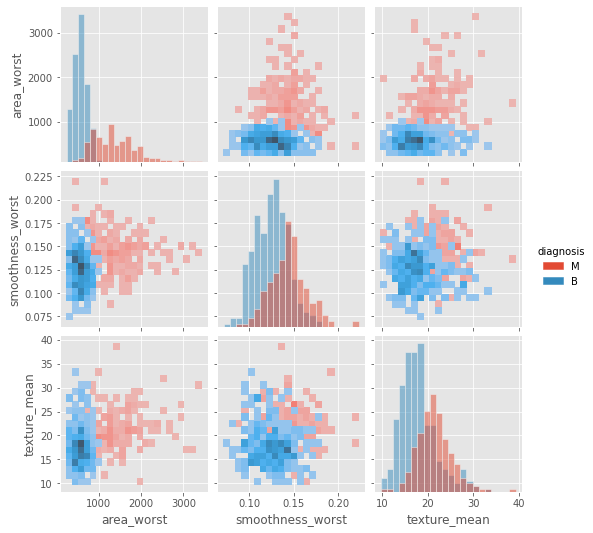

In [44]:
sns.pairplot(data_c[['diagnosis','area_worst', 'smoothness_worst', 'texture_mean']], hue='diagnosis', kind='hist')

# Pearson and spearman correlation

In [48]:
print('Pearson correlation')
data_c.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "pearson")

Pearson correlation


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.234198      0.427652
smoothness_worst    0.234198          1.000000      0.180217
texture_mean        0.427652          0.180217      1.000000

In [52]:
print('Pearson correlation with outliers')
data.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "pearson")

Pearson correlation with outliers


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.209145      0.343546
smoothness_worst    0.209145          1.000000      0.077503
texture_mean        0.343546          0.077503      1.000000

In [49]:
print('Spearman correlation')
data_c.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "spearman")

Spearman correlation


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.211331      0.413454
smoothness_worst    0.211331          1.000000      0.176030
texture_mean        0.413454          0.176030      1.000000

In [50]:
print('Spearman correlation with outliers')
data.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "spearman")

Spearman correlation with outliers


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.210063      0.368335
smoothness_worst    0.210063          1.000000      0.101401
texture_mean        0.368335          0.101401      1.000000